In [1]:
import numpy as np 
import pandas as pd 
import json
import os
import ipywidgets as widgets
from IPython.display import clear_output, display
from top2vec import Top2Vec

In [2]:
data = pd.read_csv("No_Duplicate_Britain_Articles.csv")
data.head()

Date  \
0  Published:  06:04 BST, 16 April 2020   
1  Published:  01:42 BST, 16 April 2020   
2  Published:  01:41 BST, 16 April 2020   
3  Published:  01:40 BST, 16 April 2020   
4  Published:  01:40 BST, 16 April 2020   

                                            Headline  \
0  PICTURED: Coronavirus patient is wheeled out o...   
1  Alan Jones ridicules a Chinese newspaper after...   
2  Australia's leading anti-vaxxer says country '...   
3  Crown Resorts stands down more than 11,000 emp...   
4  When to book flights after lockdown is lifted:...   

                                            Articles  
0  medical professionals see respond wednesday ho...  
1  broadcaster alan jones ridicule chinese newspa...  
2  one australia prominent activists tell others ...  
3  crown resorts stand employees melbourne perth ...  
4  australians keen head holiday soon lockdown li...

In [6]:
# top2vec = Top2Vec(documents=data.Articles, speed="deep-learn", workers=4)

In [7]:
# top2vec.save("Britain_Covid-19_Top2Vec_model")

In [3]:
top2vec = Top2Vec.load("Britain_Covid-19_Top2Vec_model")

In [4]:
top2vec.get_num_topics()

308

In [5]:
import umap
import time
umap_embeddings = umap.UMAP(n_neighbors=15,
                            n_components=5,
                            min_dist=0.0,
                            metric='cosine',
                            random_state=42).fit_transform(top2vec.topic_vectors)

In [6]:
import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=15,
                         metric='euclidean',
                         cluster_selection_method='eom').fit(umap_embeddings)

In [8]:
import matplotlib.pyplot as plt

# Prepare data
umap_data = umap.UMAP(n_neighbors=10, n_components=, min_dist=0.0, metric='cosine').fit_transform(top2vec.topic_vectors)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(8, 5))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=1.0)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=1.0, cmap='hsv_r')
plt.colorbar()
# plt.savefig("India_covid.png", dpi = 300)

ValueError: Shape of passed values is (308, 5), indices imply (308, 2)

In [6]:
topic_sizes, topic_nums = top2vec.get_topic_sizes()
print(topic_sizes)
print("-----------------")
print(topic_nums)

[369 363 305 298 275 268 248 246 244 240 226 225 213 207 206 201 195 190
 179 170 169 169 160 160 157 151 150 143 142 142 140 139 137 129 129 128
 124 124 123 122 122 122 120 118 115 115 115 113 111 110 109 108 108 107
 106 106 105 105 104 104 103 103 103 103 102 102 101 101 101 100  99  99
  98  97  95  94  93  92  92  90  89  89  88  88  85  84  84  84  84  84
  83  83  82  82  82  82  82  81  81  81  80  80  79  79  78  78  78  77
  76  76  75  75  75  74  74  74  73  73  73  73  73  72  72  71  71  71
  71  71  71  71  71  70  70  70  70  69  69  69  69  69  68  68  68  66
  66  66  66  64  64  64  63  63  63  62  62  62  62  62  61  61  61  61
  59  59  59  59  58  58  58  56  56  56  56  55  55  54  54  54  54  54
  53  53  53  53  53  52  52  52  51  51  51  51  50  50  50  50  50  50
  50  49  49  49  48  48  48  47  47  47  47  47  46  46  45  45  45  45
  45  44  44  44  44  43  43  43  43  43  43  42  42  42  42  42  42  42
  41  41  41  41  41  41  40  40  40  40  39  39  3

In [7]:
topic_words, word_scores, topic_nums = top2vec.get_topics(308)
print(topic_words)

[['coma' 'newborn' 'neonatal' ... 'intensive' 'chest' 'nightmares']
 ['pupils' 'teachers' 'education' ... 'headteacher' 'longfield' 'grady']
 ['melburnians' 'andrews' 'victorians' ... 'infringements' 'shepparton'
  'brimbank']
 ...
 ['beirut' 'lebanese' 'lebanon' ... 'casualties' 'incompetence' 'gunmen']
 ['mink' 'minks' 'cull' ... 'implicate' 'cage' 'cat']
 ['lentz' 'hillsong' 'bieber' ... 'boast' 'relationships' 'worshippers']]


In [12]:
topic_words, word_scores, topic_scores, topic_nums = top2vec.search_topics(keywords=["newborn"], num_topics=10)
print(topic_words)
print("----------")
print(word_scores)
print("----------")
print(topic_scores)
print("----------")
print(topic_nums)
print("----------")

[array(['coma', 'newborn', 'neonatal', 'ventilator', 'mother', 'ward',
       'sedate', 'heartbreaking', 'induce', 'caesarean', 'deteriorate',
       'birth', 'awake', 'oxygen', 'cpap', 'sepsis', 'goodbyes',
       'breaths', 'terrify', 'ordeal', 'love', 'intubate', 'alive',
       'placenta', 'agony', 'newborns', 'lucky', 'breathless', 'mrs',
       'facetime', 'helpless', 'grandmother', 'traumatic', 'baby', 'womb',
       'thankfully', 'dialysis', 'gasp', 'felt', 'father', 'mum',
       'bedside', 'kloots', 'pregnancy', 'wheelchair', 'kidneys', 'son',
       'intensive', 'chest', 'nightmares'], dtype='<U15'), array(['symonds', 'carrie', 'wilfred', 'dilyn', 'lawrie', 'fiancee',
       'chequers', 'fiance', 'paternity', 'camberwell', 'pitarma',
       'birth', 'marina', 'boris', 'johnson', 'pm', 'downing', 'mcgee',
       'nicholas', 'thomas', 'prime', 'mend', 'recuperate', 'wheeler',
       'congratulations', 'maternity', 'stratton', 'pregnant', 'allegra',
       'deputise', 'fianc', 

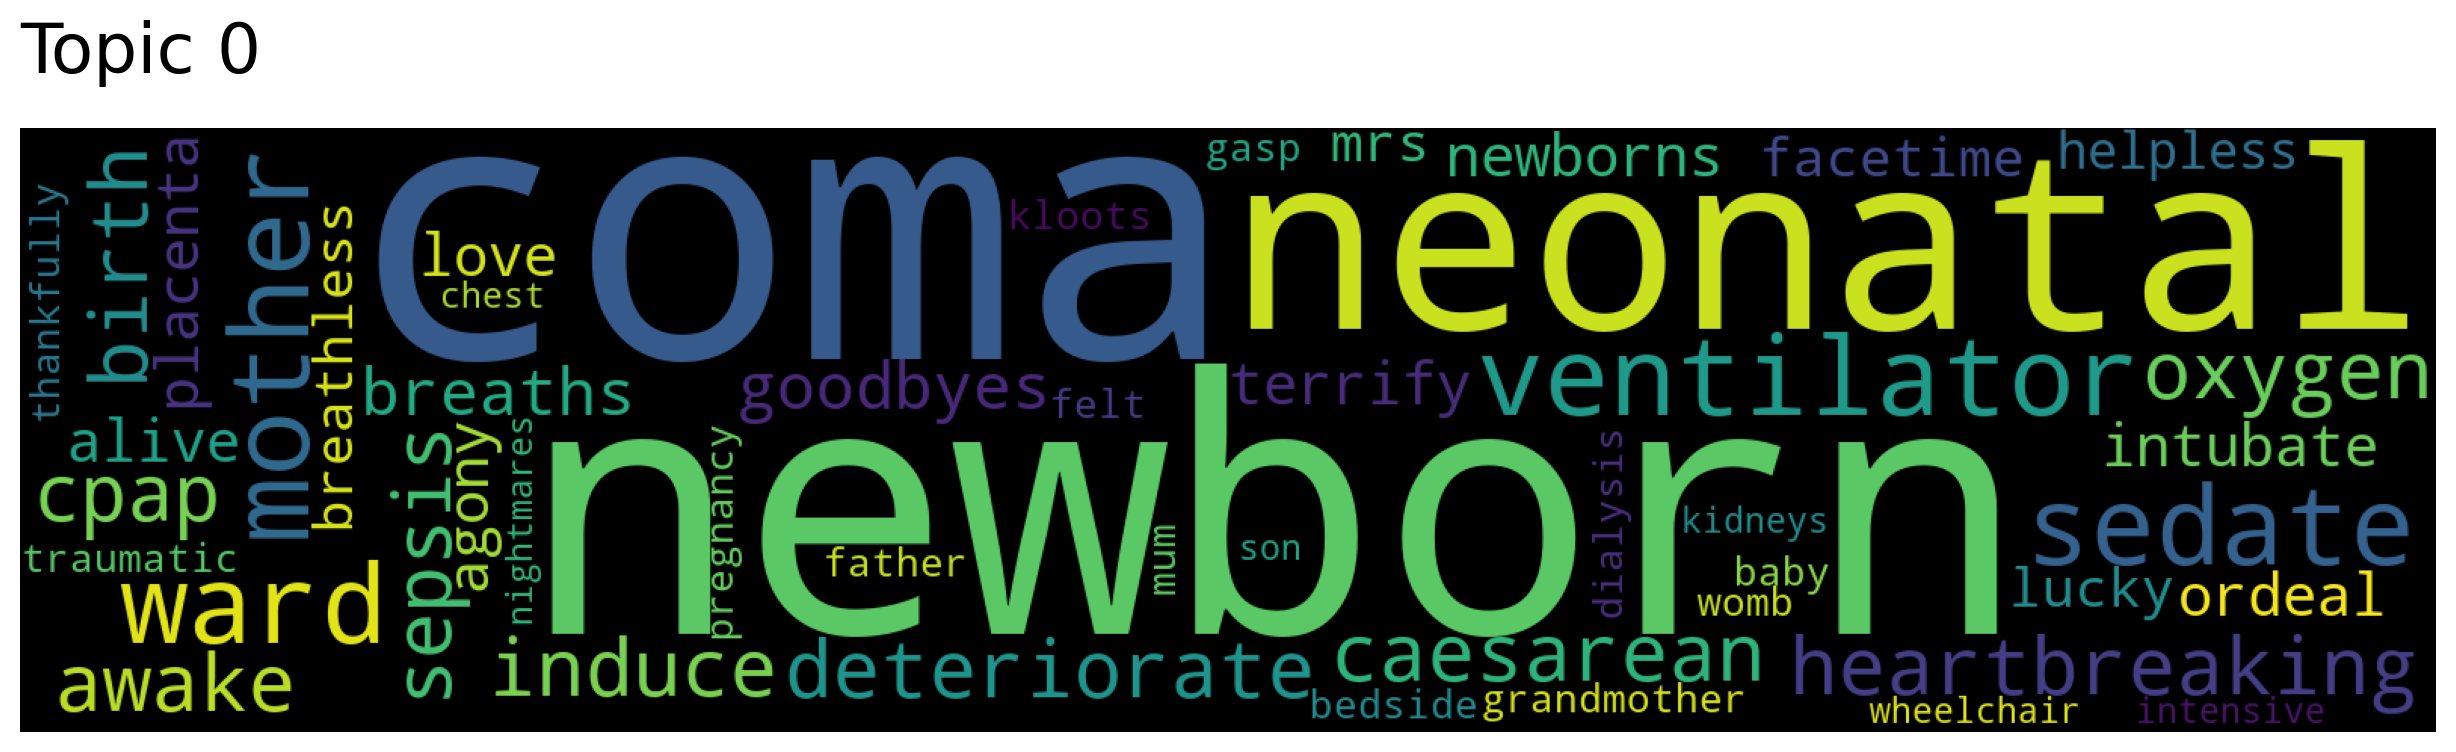

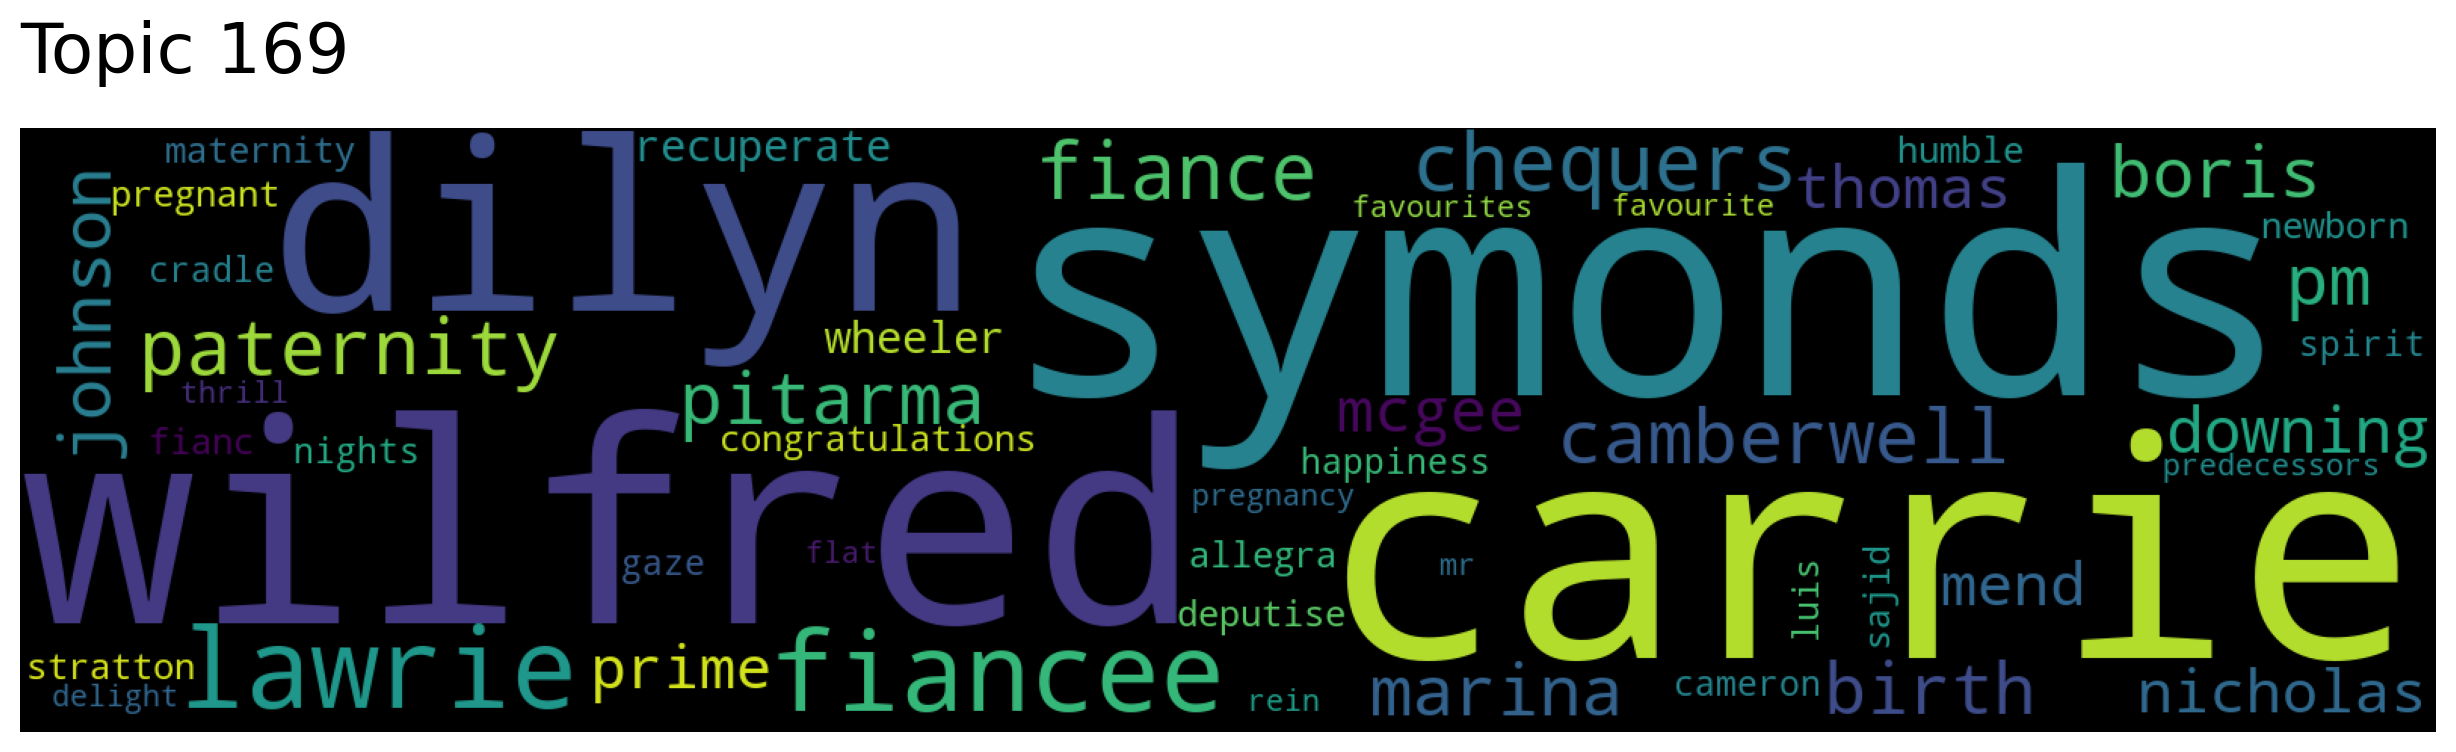

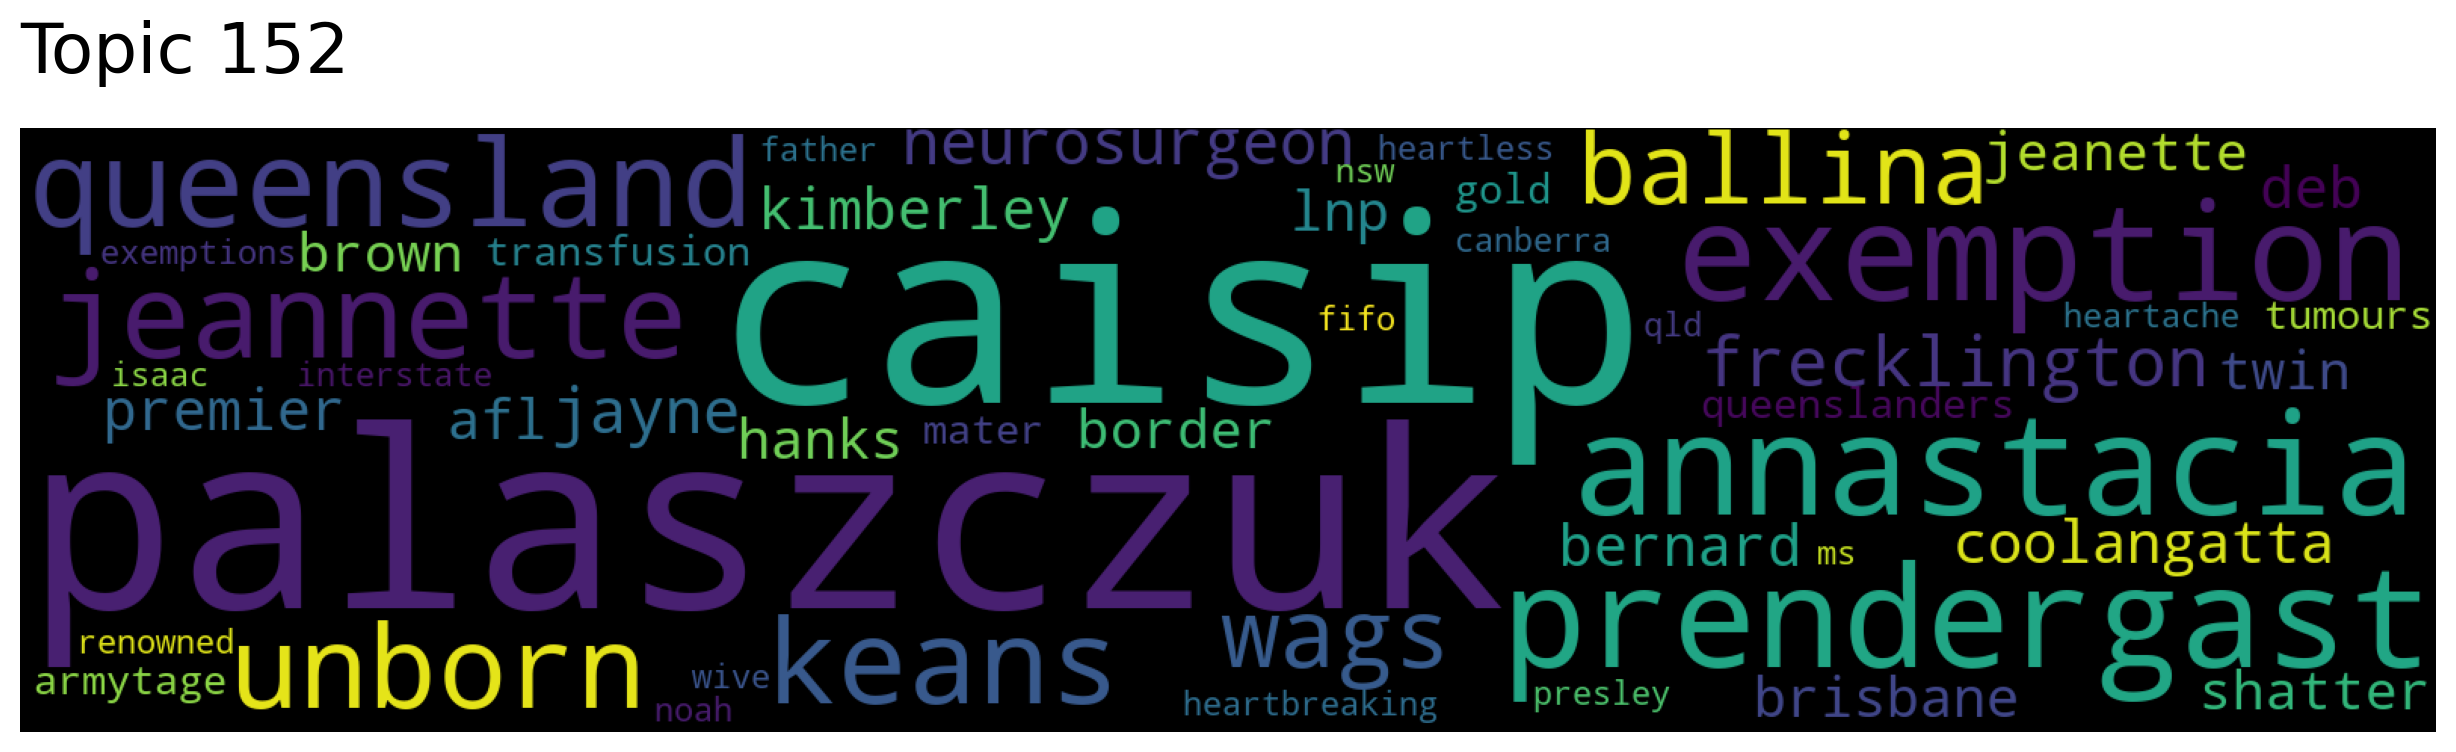

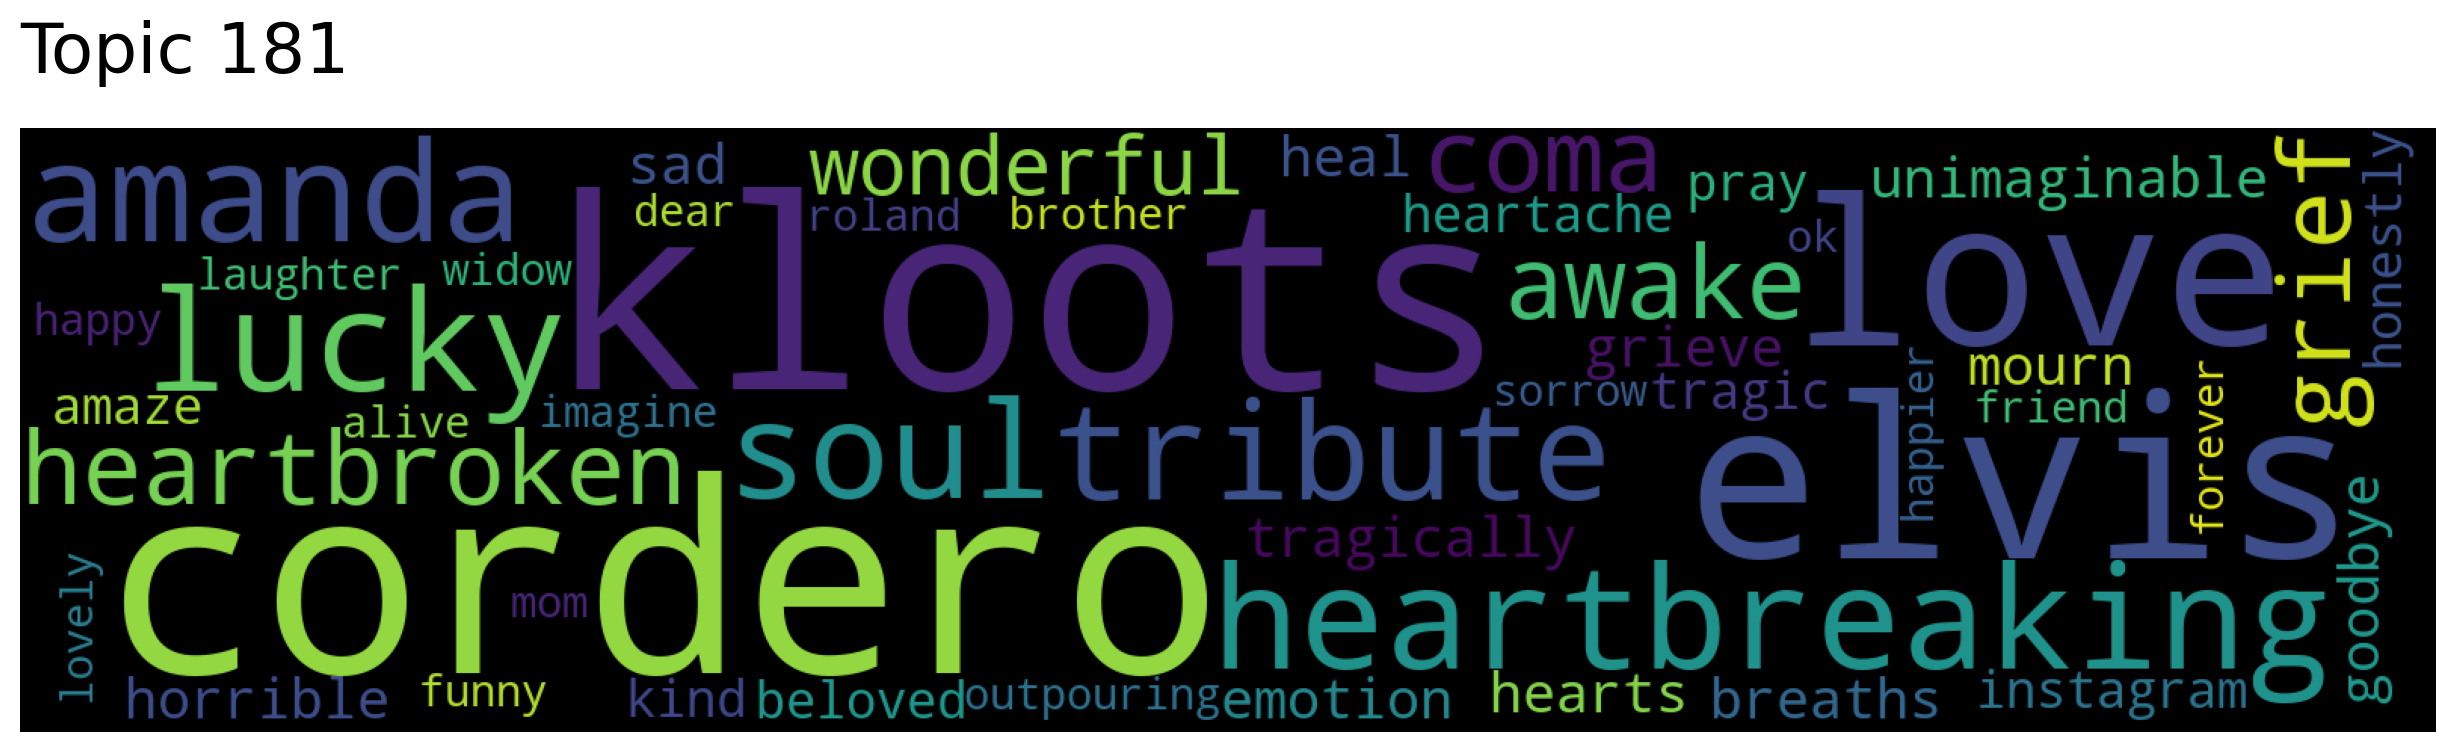

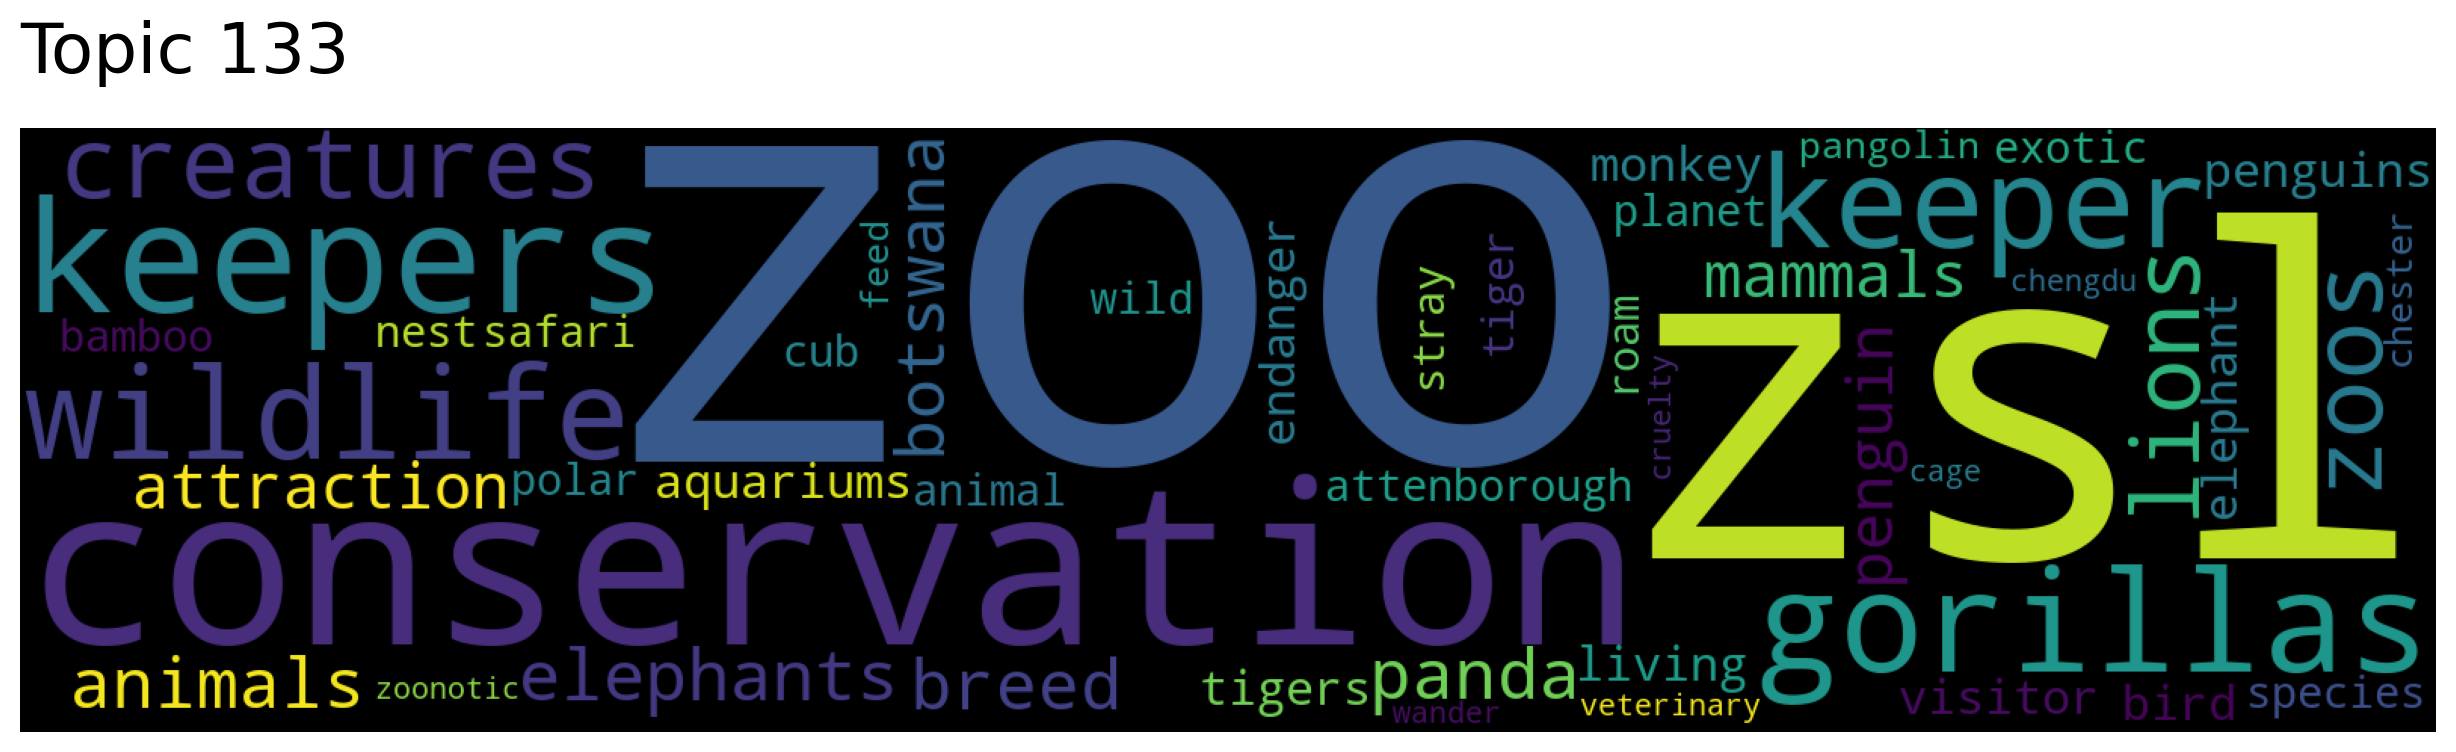

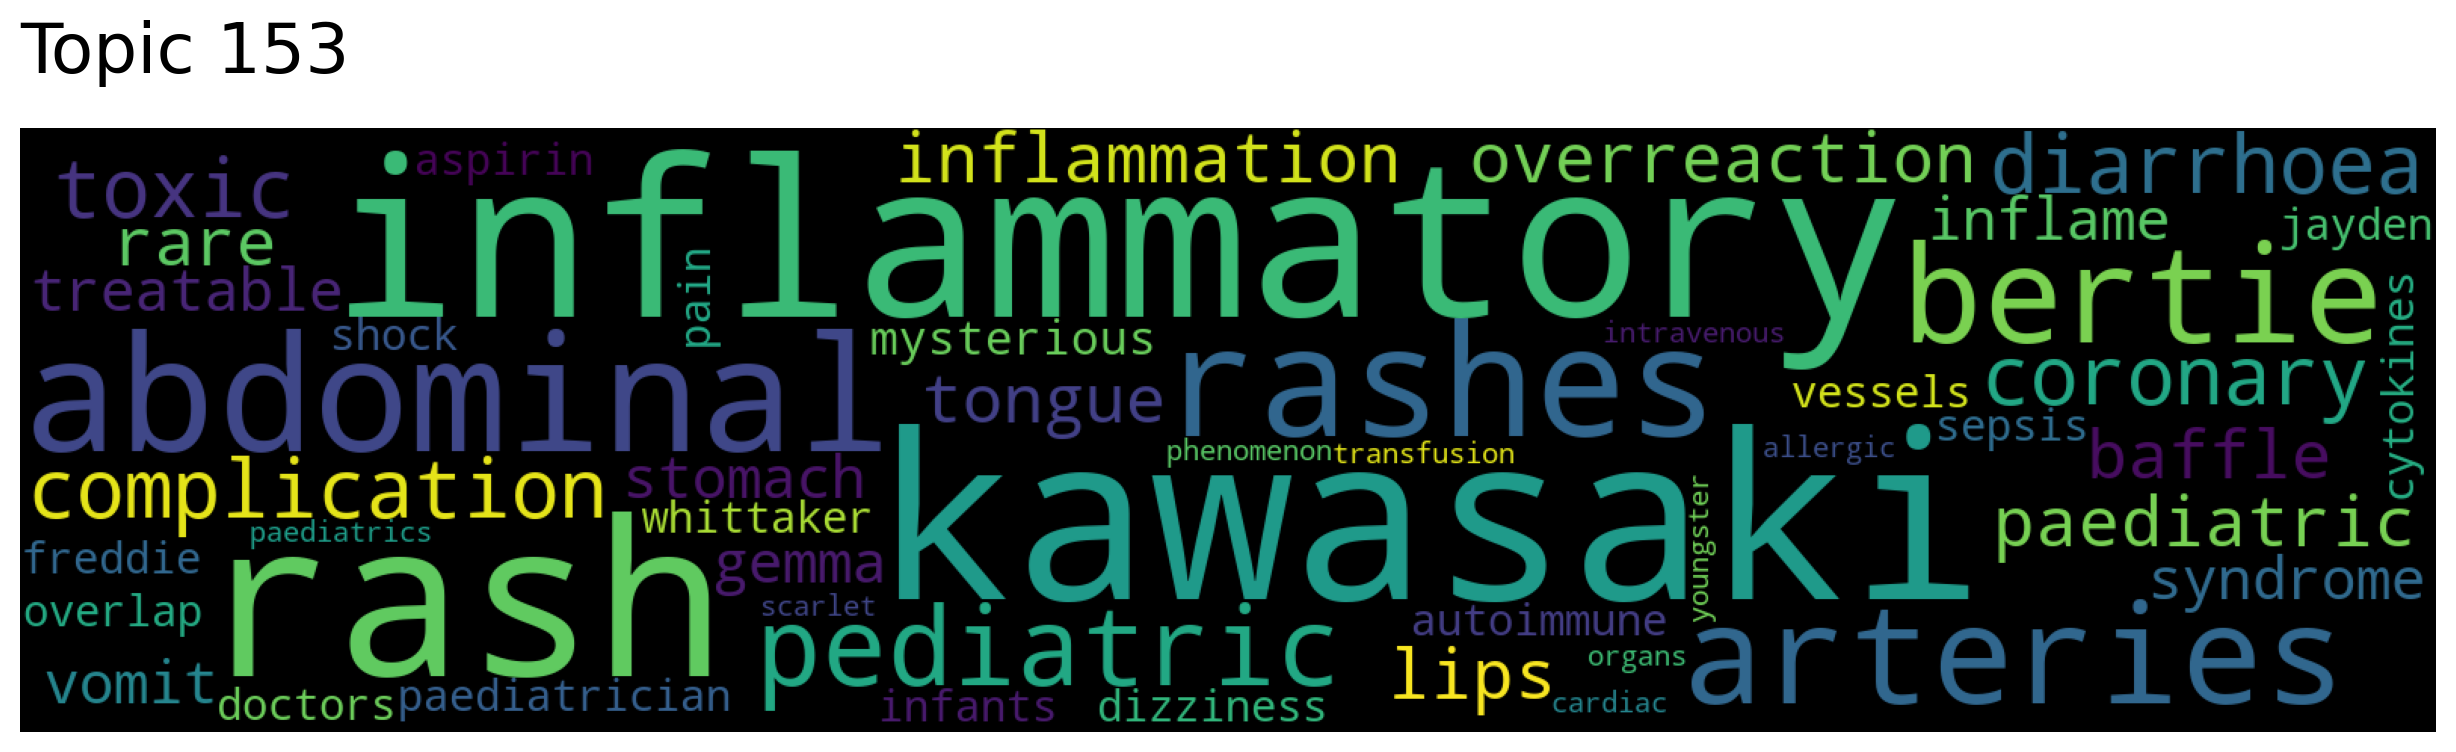

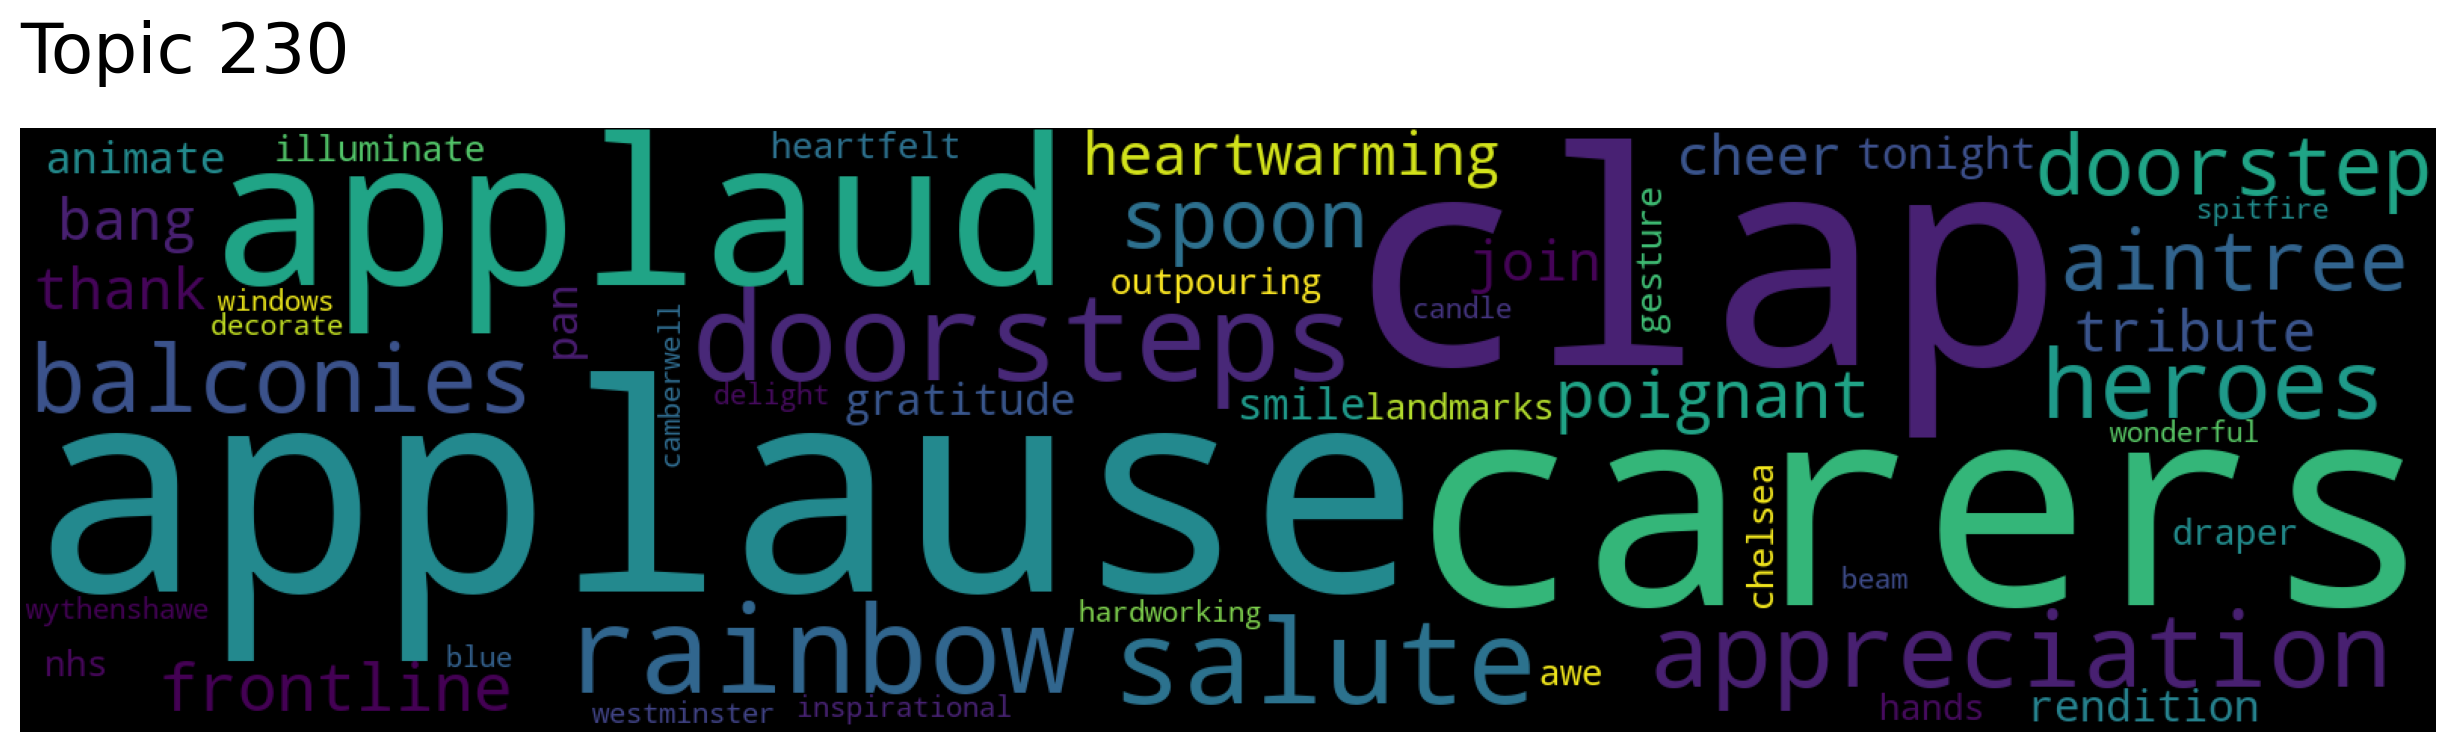

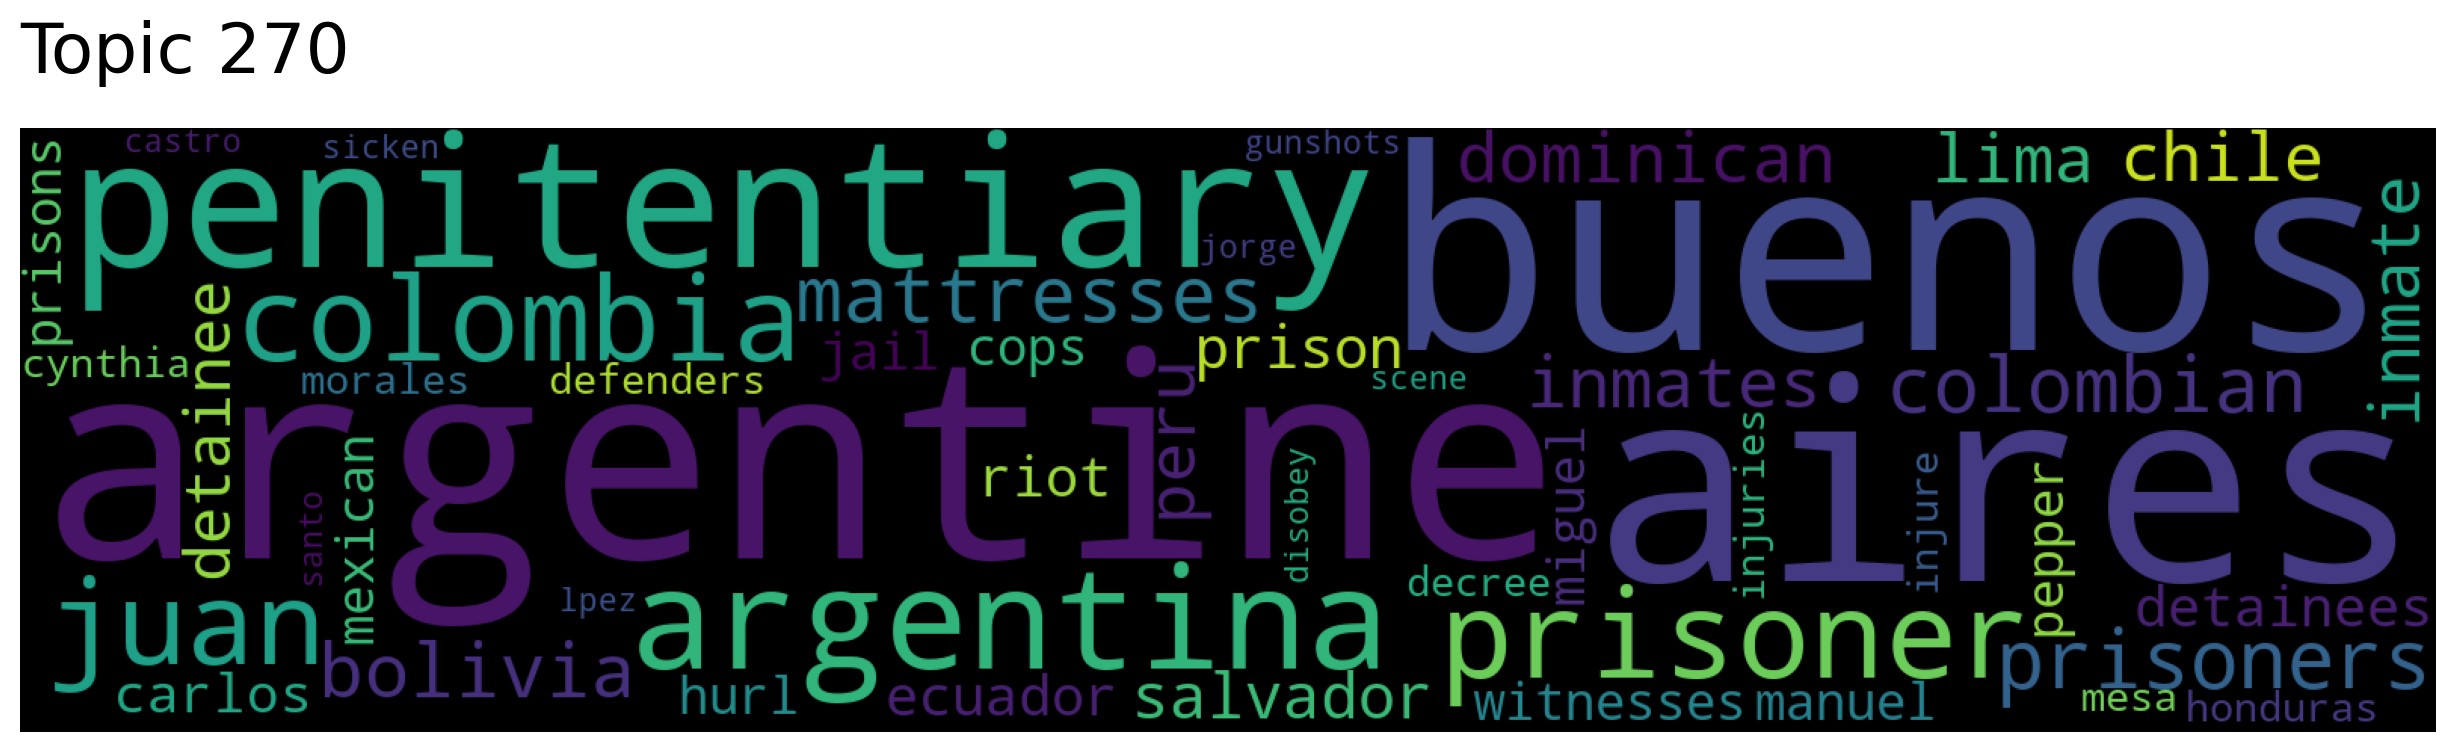

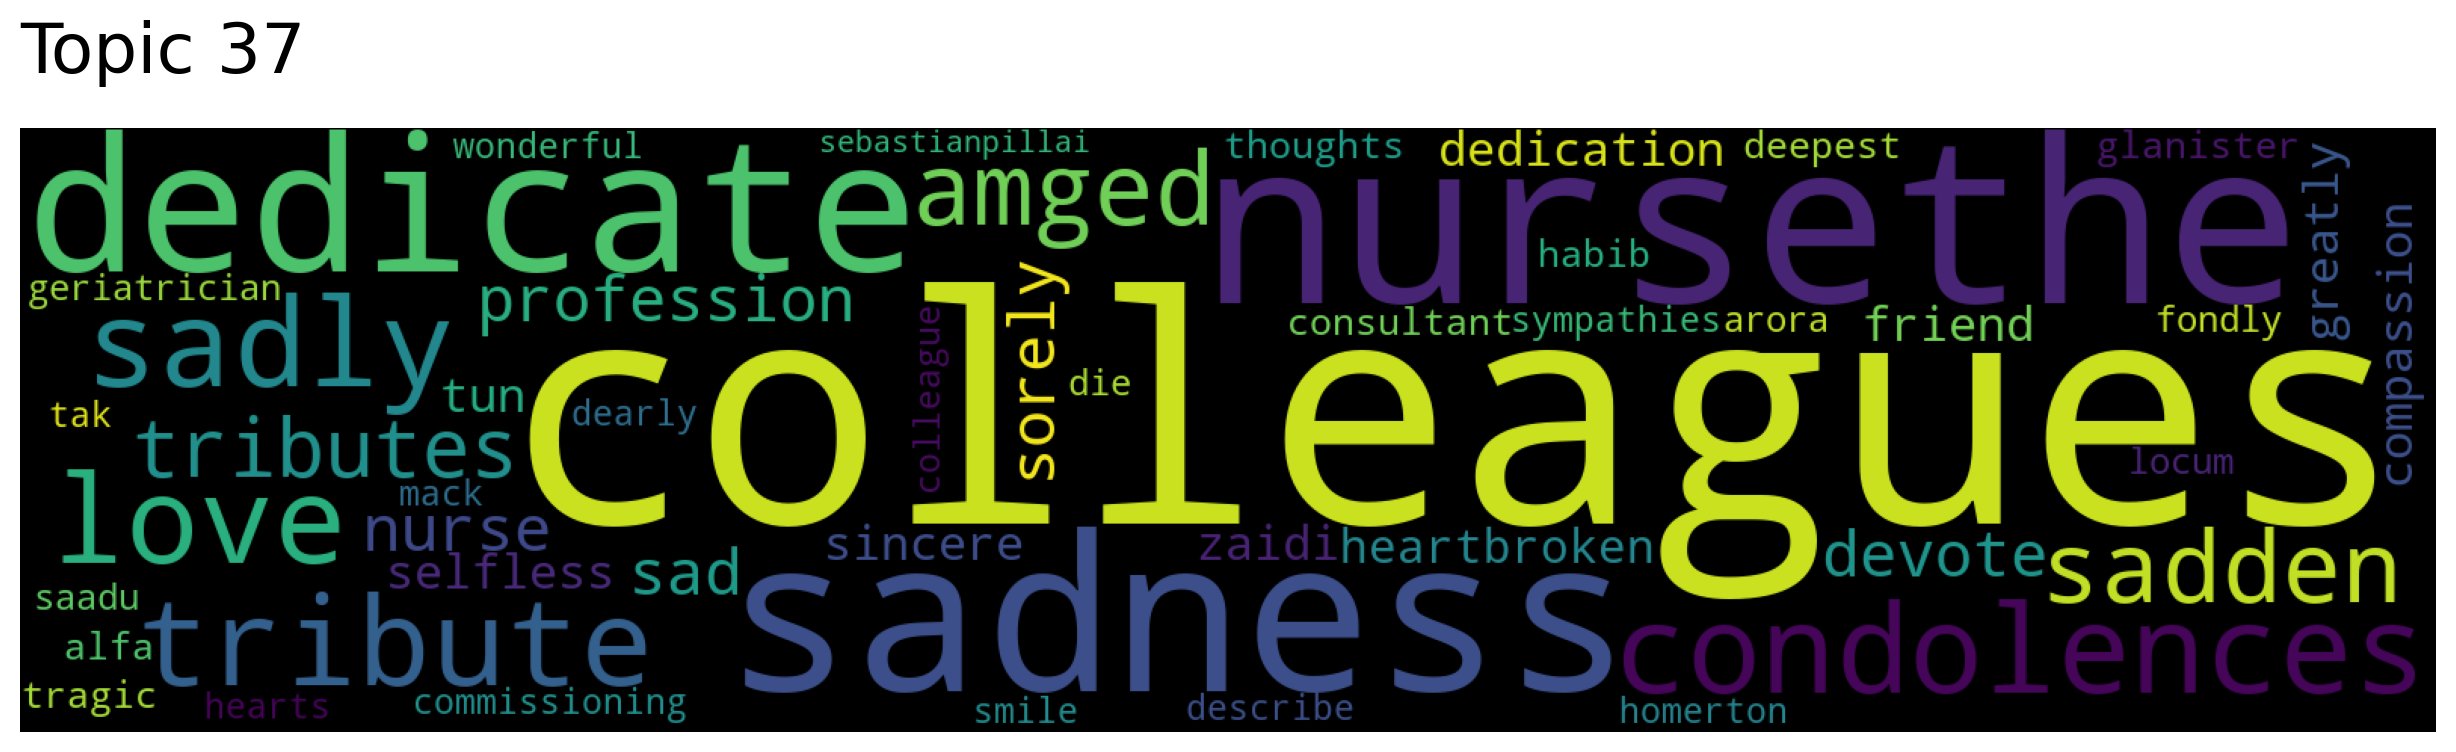

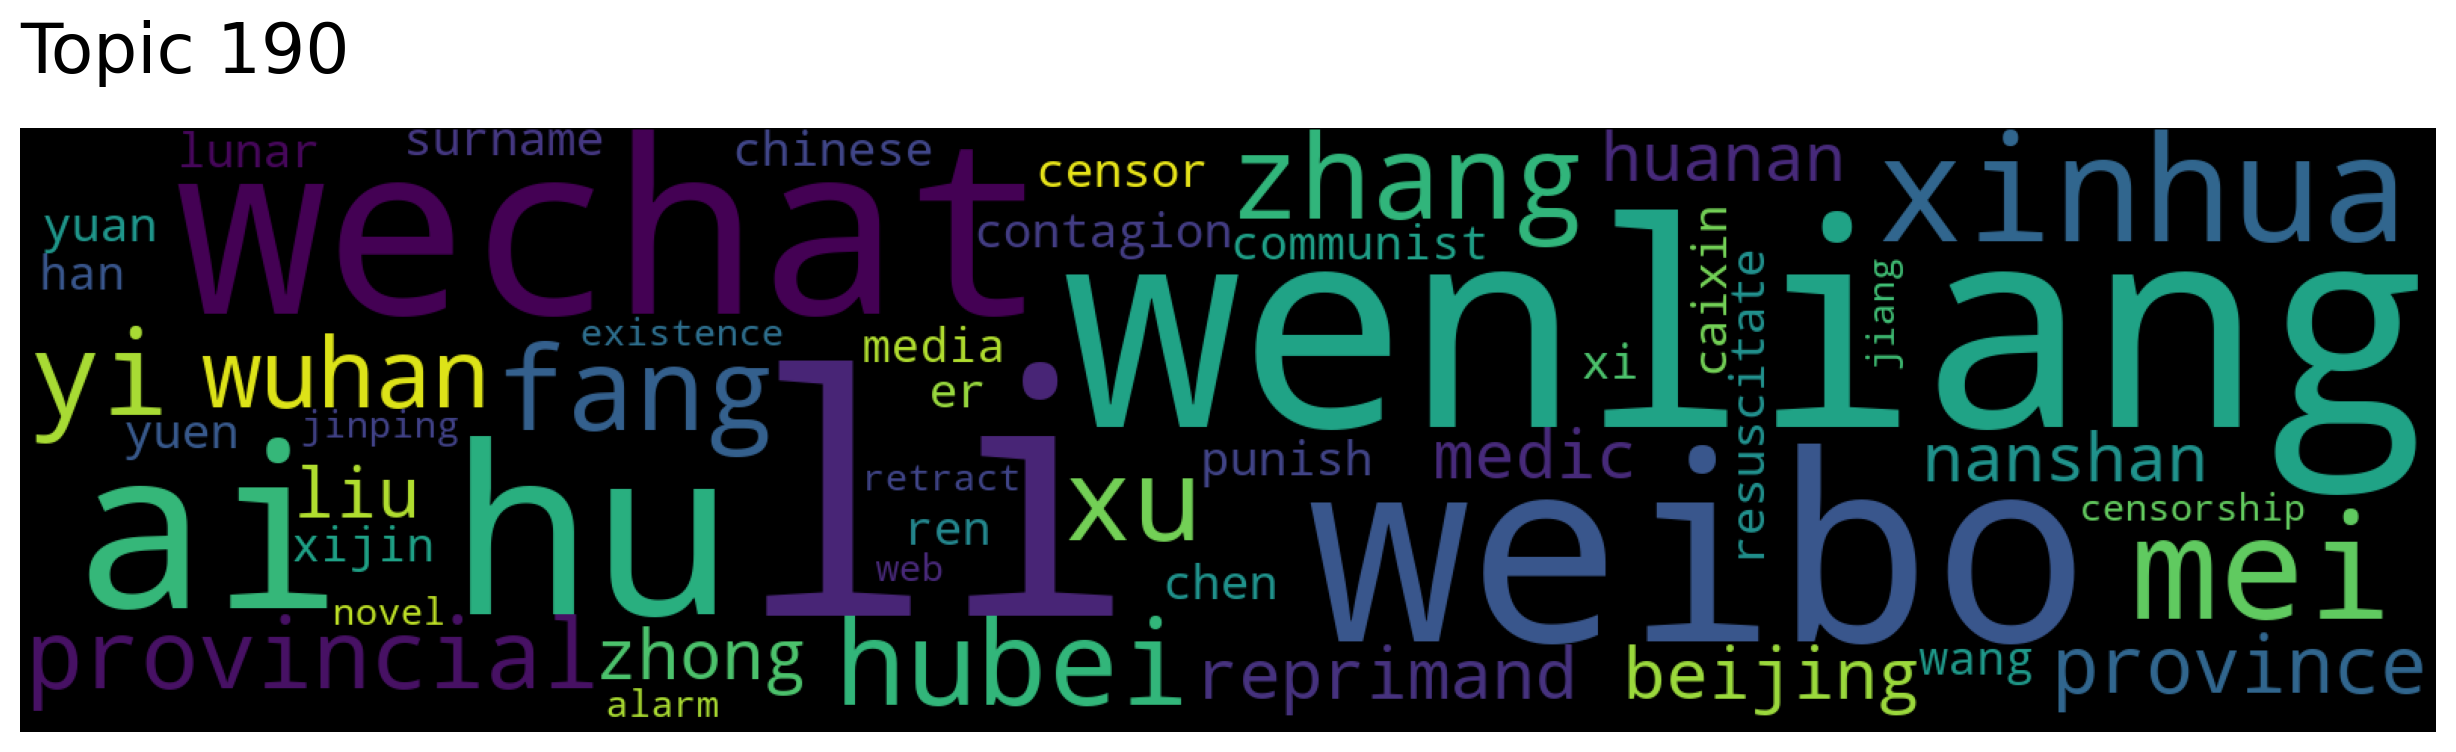

In [10]:
topic_words, word_scores, topic_scores, topic_nums = top2vec.search_topics(keywords=["newborn"], num_topics=10)
for topic in topic_nums:
    top2vec.generate_topic_wordcloud(topic)

In [14]:
documents, document_scores, document_ids = top2vec.search_documents_by_topic(topic_num=24, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 14725, Score: 0.6989891529083252
-----------
spanish authorities implement curfew across catalonia spain declare state emergency due president generalitat quim torra order total closure catalonia stop spread midnight no one able enter leave region inhabitants people infect spanish authorities implement curfew across catalonia spain declare state emergency due coronaviruscatalonia encompass provinces girona barcelona tarragona lleida evolution contagion require us drastic say mr torra appear palau de la generalitat announce new measure combat announcement catalan government come whole spain enter state emergency exceptional measure formalize tomorrow council ministersmr torra say even press conference ready confine country respond great challenge need collaboration state structure not competence port airports railway system midnight no one able enter leave region inhabitants include barcelona people infectedaround people also place lockdown murcia coastal region include popula

In [ ]:
documents, document_scores, document_ids = top2vec.search_documents_by_keywords(keywords=["Shinzo", "Abe"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

In [13]:
words, word_scores = top2vec.similar_words(keywords=["newborn"], keywords_neg=[], num_words=40)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

birth 0.766
newborns 0.6516
baby 0.6202
placenta 0.5882
neonatal 0.5816
unborn 0.5694
maternity 0.5386
pregnant 0.5304
caesarean 0.5236
mother 0.518
infant 0.5142
pregnancy 0.5123
obstetricians 0.4944
womb 0.4895
premature 0.4811
son 0.4756
wilfred 0.4725
boy 0.4601
child 0.4581
bear 0.4521
lawrie 0.4486
infants 0.4474
paternity 0.4452
prematurely 0.4436
youngest 0.4377
miscarriage 0.4198
carrie 0.4015
cradle 0.4002
miscarriages 0.3941
nicholas 0.3929
maternal 0.3917
heartbreaking 0.3869
breastfeed 0.3859
father 0.3812
twin 0.3779
symonds 0.3764
induce 0.3681
ultrasound 0.3676
midwives 0.3638
ward 0.3595
